In [2]:
%tensorflow_version 1.x
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
import warnings
warnings.filterwarnings("ignore")

from tensorflow.examples.tutorials.mnist import input_data
print(input_data)
type(input_data)
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

<module 'tensorflow.examples.tutorials.mnist.input_data' from '/tensorflow-1.15.2/python3.6/tensorflow_core/examples/tutorials/mnist/input_data.py'>
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.g

In [6]:
print("The shape of x_train is",mnist.train.images.shape)
print("The shape of y_train is",mnist.train.labels.shape)
print("The shape of x_test is",mnist.test.images.shape)
print("The shape of y_test is",mnist.test.labels.shape)

The shape of x_train is (55000, 784)
The shape of y_train is (55000, 10)
The shape of x_test is (10000, 784)
The shape of y_test is (10000, 10)


In [7]:
print("The type of x_train is",type(mnist.train.images))
print("The type of y_train is",type(mnist.train.labels))
print("The type of x_test is",type(mnist.test.images))
print("The type of y_test is",type(mnist.test.labels))

The type of x_train is <class 'numpy.ndarray'>
The type of y_train is <class 'numpy.ndarray'>
The type of x_test is <class 'numpy.ndarray'>
The type of y_test is <class 'numpy.ndarray'>


In [8]:
print("number of data points : ", mnist.train.images.shape[0],"number of pixels in each image :",mnist.train.images.shape[1])

number of data points :  55000 number of pixels in each image : 784


In [9]:
print("number of data points : ", mnist.test.labels.shape[0]," length of the one hot encoded label vector :",mnist.test.labels.shape[1])

number of data points :  10000  length of the one hot encoded label vector : 10


In [10]:
#Architecture - Network Parameter
n_input= 784 #input layer of neurons
n_hidden1= 512 #1st layer of neurons
n_hidden2 = 128 #2nd layer of neurons
n_output = 10 #output layer of neurons

In [14]:
#Weignts initialization
#For sigmoid activation unit we will use "Xavier/Glorot" weights and for Relu we will use "He" initialization
#in sigmoid we take w which is normally distributted with mean = 0 and std dev = sqrt(2/fan_in+fan_out)
#in relu activation unit we will use He initialization with weights as normally distribued with mean 0 and std dev = sqrt(2/fan_in)

#Defining the weights for sigmoid cativation units in all the layers

stddev_sigm1 = np.sqrt(2/(784+512))
stddev_sigm2 = np.sqrt(2/(512+128))
stddev_sigm3 = np.sqrt(2/(128+10))

weights_sigm = {"layer1":tf.Variable(tf.random_normal(shape=[784,512], mean=0.0, stddev=stddev_sigm1)),
                "layer2":tf.Variable(tf.random_normal(shape=[512,128], mean=0.0, stddev=stddev_sigm2)),
                "output": tf.Variable(tf.random_normal(shape=[128,10], mean=0.0, stddev=stddev_sigm3))
              }

In [18]:
#Defining Biases for all the three layer
#we define biases using random normal with mean as 0 and stddev as 1

biases = {
    "b1" : tf.Variable(tf.random_normal(shape=[512], mean=0.0, stddev=1.0)),
    "b2" : tf.Variable(tf.random_normal(shape=[128], mean=0.0, stddev=1.0)),
    "out": tf.Variable(tf.random_normal(shape=[10], mean= 0.0, stddev=1.0))
}

In [16]:
#Parameters

n_epochs = 30
batch_size = 1000
no_of_batches = int(mnist.train.num_examples/batch_size)

# **#Model1**
# Input(784)-Sigmoid_Layer1(512)-Sigmoid_Layer2(128)-Softmax(Output10) 


In [21]:
#Creating placeholders and Y values at each layer

x= tf.placeholder(dtype=tf.float32, shape=[None, 784], name="placeholder1")
print("The shape of x is :",x.get_shape())
y_actual = tf.placeholder(dtype=tf.float32, shape=[None, 10], name='placeholder2')
print("The shape of y_actual is :",y_actual.get_shape())

y_layer1 = tf.sigmoid(tf.matmul(x,weights_sigm['layer1'])+biases['b1'])
print("The shape of y_layer1 is :",y_layer1.get_shape())

y_layer2 = tf.sigmoid(tf.matmul(y_layer1,weights_sigm['layer2'])+biases['b2'])
print("The shape of y_layer2 is :",y_layer2.get_shape())

y_output = tf.nn.softmax(tf.matmul(y_layer2,weights_sigm['output'])+biases['out'])
print("The shape of y_output is :",y_output.get_shape())

The shape of x is : (?, 784)
The shape of y_actual is : (?, 10)
The shape of y_layer1 is : (?, 512)
The shape of y_layer2 is : (?, 128)
The shape of y_output is : (?, 10)


In [22]:
#CrossEntropy Loss and Adam Optimizer

loss = tf.reduce_mean(-tf.reduce_sum(y_actual*tf.log(y_output), axis = 1))
optimizer = tf.train.AdamOptimizer().minimize(loss)

In [24]:
#Creating a session and initializing all the variables

sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

The weight distribution before the Optimization :




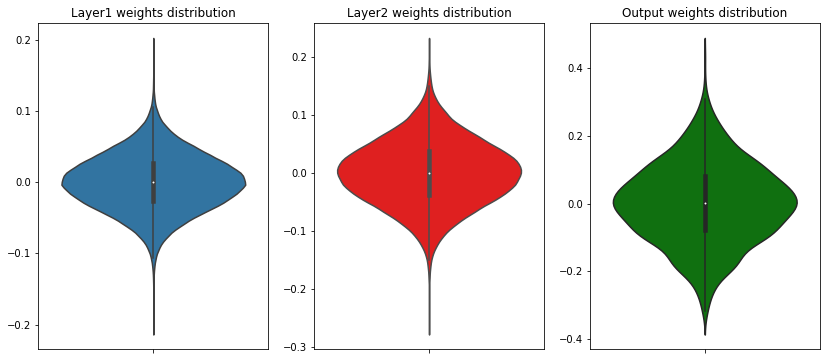

In [30]:
import seaborn as sns

print("The weight distribution before the Optimization :")
print("\n")

plt.figure(num=1, figsize=(14,6))

plt.subplot(131)
sns.violinplot(y = sess.run(weights_sigm['layer1']).ravel())
plt.title("Layer1 weights distribution")

plt.subplot(132)
sns.violinplot(y = sess.run(weights_sigm['layer2']).ravel(), color='red')
plt.title("Layer2 weights distribution")

plt.subplot(133)
sns.violinplot(y = sess.run(weights_sigm['output']).ravel(), color="green")
plt.title("Output weights distribution")

plt.show()

In [32]:
from tqdm import tqdm
batch_size = 1000
n_epochs = 20

xs, train_epoch_loss, test_epoch_loss = [], [], []

for epoch in tqdm(range(n_epochs)):
  train_loss_in_one_epoch = 0.0
  test_loss_in_one_epoch = 0.0
  for j in range(int(mnist.train.num_examples/batch_size)):

    batch_x, batch_y = mnist.train.next_batch(batch_size)

    _ ,c = sess.run([optimizer, loss], feed_dict={x:batch_x, y_actual:batch_y})
    train_loss_in_one_epoch = train_loss_in_one_epoch + c

    c_pred = sess.run(loss, feed_dict={x:mnist.test.images, y_actual:mnist.test.labels})
    test_loss_in_one_epoch = test_loss_in_one_epoch + c_pred
  
  train_epoch_loss.append(train_loss_in_one_epoch)
  test_epoch_loss.append(test_loss_in_one_epoch)

100%|██████████| 20/20 [03:32<00:00, 10.64s/it]


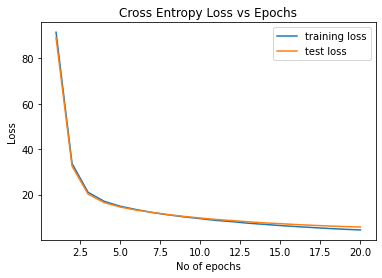

In [36]:
import matplotlib.pyplot as plt
plt.plot(range(1,21),train_epoch_loss , label = "training loss")
plt.plot(range(1,21), test_epoch_loss, label='test loss')
plt.legend()
plt.title("Cross Entropy Loss vs Epochs")
plt.xlabel("No of epochs")
plt.ylabel("Loss")
plt.show()

In [38]:
pred_class_train = sess.run(tf.argmax(sess.run(y_output, feed_dict={x:mnist.train.images}), axis=1))
actual_class_train = sess.run(tf.argmax(mnist.train.labels, axis=1))

accuracy = sess.run(tf.reduce_mean(tf.cast(tf.equal(actual_class_train, pred_class_train), dtype=tf.float32))*100)
print("The accuracy of the model on train data is", accuracy)

print("="*80)

pred_class_test = sess.run(tf.argmax(sess.run(y_output, feed_dict={x:mnist.test.images}), axis=1))
actual_class_test = sess.run(tf.argmax(mnist.test.labels, axis=1))

accuracy = sess.run(tf.reduce_mean(tf.cast(tf.equal(actual_class_test, pred_class_test), dtype=tf.float32))*100)
print("The accuracy of the model on test data is", accuracy)

The accuracy of the model on train data is 97.95637
The accuracy of the model on test data is 96.87


The weight distribution after the Optimization :




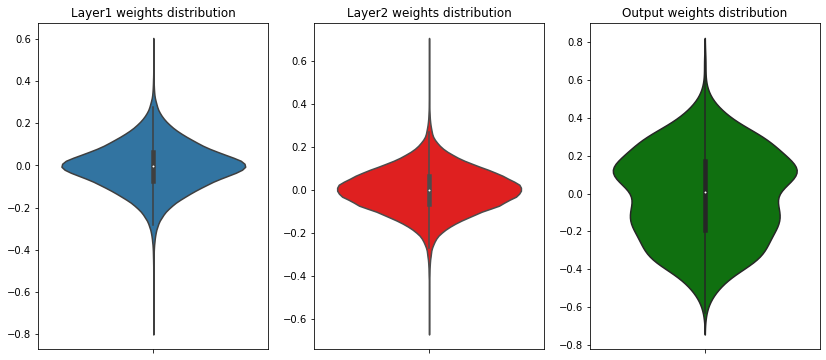

In [37]:
import seaborn as sns

print("The weight distribution after the Optimization :")
print("\n")

plt.figure(num=1, figsize=(14,6))

plt.subplot(131)
sns.violinplot(y = sess.run(weights_sigm['layer1']).ravel())
plt.title("Layer1 weights distribution")

plt.subplot(132)
sns.violinplot(y = sess.run(weights_sigm['layer2']).ravel(), color='red')
plt.title("Layer2 weights distribution")

plt.subplot(133)
sns.violinplot(y = sess.run(weights_sigm['output']).ravel(), color="green")
plt.title("Output weights distribution")

plt.show()

The biases after running the optimization is :




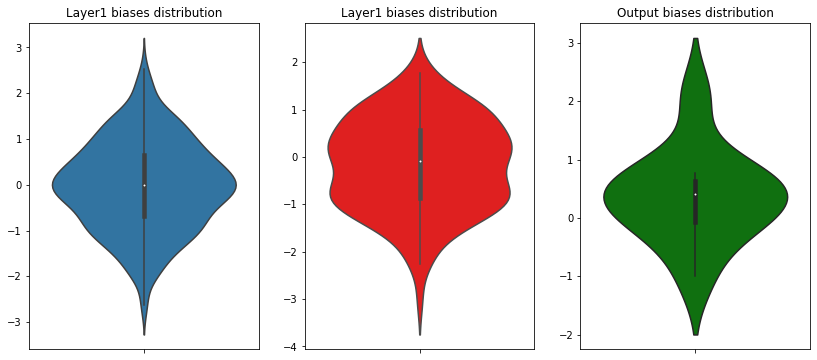

In [39]:
#Biases_final

print("The biases after running the optimization is :")
print("\n")

plt.figure(num=1, figsize=(14,6))

plt.subplot(131)
sns.violinplot(y = sess.run(biases['b1']).ravel())
plt.title("Layer1 biases distribution")

plt.subplot(132)
sns.violinplot(y = sess.run(biases['b2']).ravel(), color='red')
plt.title("Layer1 biases distribution")

plt.subplot(133)
sns.violinplot(y = sess.run(biases['out']).ravel(), color="green")
plt.title("Output biases distribution")
plt.show()

In [40]:
print('='*100)

# **#Model2**
# Input(784)-Relu_Layer1(512)-Relu_Layer2(128)-Softmax(Output10) 

In [41]:
#Architecture - Network Parameter
n_input= 784 #input layer of neurons
n_hidden1= 512 #1st layer of neurons
n_hidden2 = 128 #2nd layer of neurons
n_output = 10 #output layer of neurons

In [45]:
# For RelU activation unit we should use "He" initialization.
#HE - w is normally distributed with mean 0 and variance(sigma) where sigma = sqrt(2/(fan_in))
#each row of the 784*512 has mean as 0 and std as stddev1

#Defining the weights for sigmoid activation unit in all the layers

stddev_rel1= np.sqrt(2/(784)) #std dev for layer 1 using He
stddev_rel2= np.sqrt(2/(512)) #std dev for layer 2 using He
stddev_rel3= np.sqrt(2/(128))  #std dev for output layer using He

weights_relu= {
    "layer1": tf.Variable(tf.random_normal(shape=[784, 512], mean=0.0, stddev=stddev_rel1)),
    "layer2": tf.Variable(initial_value=tf.random_normal(shape=[512, 128], mean=0.0, stddev=stddev_rel2)),
    "output": tf.Variable(initial_value=tf.random_normal(shape=[128, 10], mean=0.0, stddev=stddev_rel3))
}

In [46]:
#Defining Biases for all the three layer
#we define biases using random normal with mean as 0 and stddev as 1

biases = {
    "b1" : tf.Variable(tf.random_normal(shape=[512], mean=0.0, stddev=1.0)),
    "b2" : tf.Variable(tf.random_normal(shape=[128], mean=0.0, stddev=1.0)),
    "out": tf.Variable(tf.random_normal(shape=[10], mean= 0.0, stddev=1.0))
}

In [50]:
#Creating placeholders and Y values at each layer

x= tf.placeholder(dtype=tf.float32, shape=[None, 784], name="placeholder1")
print("The shape of x is :",x.get_shape())

y_actual = tf.placeholder(dtype=tf.float32, shape=[None, 10], name='placeholder2')
print("The shape of y_actual is :",y_actual.get_shape())

y_layer1 = tf.nn.relu(tf.matmul(x,weights_relu['layer1'])+biases['b1'])
print("The shape of y_layer1 is :",y_layer1.get_shape())

y_layer2 = tf.nn.relu(tf.matmul(y_layer1,weights_relu['layer2'])+biases['b2'])
print("The shape of y_layer2 is :",y_layer2.get_shape())

y_output = tf.nn.softmax(tf.matmul(y_layer2,weights_relu['output'])+biases['out'])
print("The shape of y_output is :",y_output.get_shape())

The shape of x is : (?, 784)
The shape of y_actual is : (?, 10)
The shape of y_layer1 is : (?, 512)
The shape of y_layer2 is : (?, 128)
The shape of y_output is : (?, 10)


In [51]:
#CrossEntropy Loss and Adam Optimizer

loss = tf.reduce_mean(-tf.reduce_sum(y_actual*tf.log(y_output), axis = 1))
optimizer = tf.train.AdamOptimizer().minimize(loss)

In [52]:
#Creating a session and initializing all the variables

sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

In [53]:
from tqdm import tqdm
batch_size = 1000
n_epochs = 20

xs, train_epoch_loss, test_epoch_loss = [], [], []

for epoch in tqdm(range(n_epochs)):
  train_loss_in_one_epoch = 0.0
  test_loss_in_one_epoch = 0.0
  for j in range(int(mnist.train.num_examples/batch_size)):

    batch_x, batch_y = mnist.train.next_batch(batch_size)

    _ ,c = sess.run([optimizer, loss], feed_dict={x:batch_x, y_actual:batch_y})
    train_loss_in_one_epoch = train_loss_in_one_epoch + c

    c_pred = sess.run(loss, feed_dict={x:mnist.test.images, y_actual:mnist.test.labels})
    test_loss_in_one_epoch = test_loss_in_one_epoch + c_pred
  
  train_epoch_loss.append(train_loss_in_one_epoch)
  test_epoch_loss.append(test_loss_in_one_epoch)

100%|██████████| 20/20 [03:30<00:00, 10.55s/it]


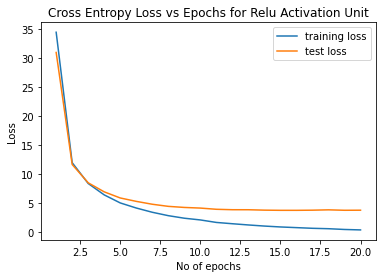

In [54]:
import matplotlib.pyplot as plt
plt.plot(range(1,21),train_epoch_loss , label = "training loss")
plt.plot(range(1,21), test_epoch_loss, label='test loss')
plt.legend()
plt.title("Cross Entropy Loss vs Epochs for Relu Activation Unit")
plt.xlabel("No of epochs")
plt.ylabel("Loss")
plt.show()

In [55]:
pred_class_train = sess.run(tf.argmax(sess.run(y_output, feed_dict={x:mnist.train.images}), axis=1))
actual_class_train = sess.run(tf.argmax(mnist.train.labels, axis=1))

accuracy = sess.run(tf.reduce_mean(tf.cast(tf.equal(actual_class_train, pred_class_train), dtype=tf.float32))*100)
print("The accuracy of the model on train data is", accuracy)

print("="*80)

pred_class_test = sess.run(tf.argmax(sess.run(y_output, feed_dict={x:mnist.test.images}), axis=1))
actual_class_test = sess.run(tf.argmax(mnist.test.labels, axis=1))

accuracy = sess.run(tf.reduce_mean(tf.cast(tf.equal(actual_class_test, pred_class_test), dtype=tf.float32))*100)
print("The accuracy of the model on test data is", accuracy)

The accuracy of the model on train data is 99.95818
The accuracy of the model on test data is 97.88


The weight distribution after the Optimization :




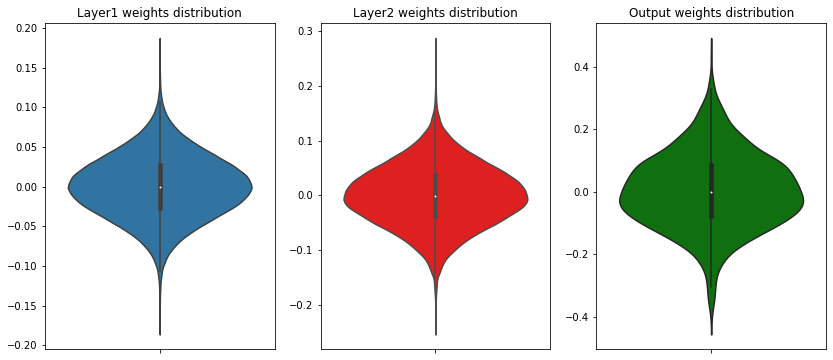

In [56]:
import seaborn as sns

print("The weight distribution after the Optimization :")
print("\n")

plt.figure(num=1, figsize=(14,6))

plt.subplot(131)
sns.violinplot(y = sess.run(weights_sigm['layer1']).ravel())
plt.title("Layer1 weights distribution")

plt.subplot(132)
sns.violinplot(y = sess.run(weights_sigm['layer2']).ravel(), color='red')
plt.title("Layer2 weights distribution")

plt.subplot(133)
sns.violinplot(y = sess.run(weights_sigm['output']).ravel(), color="green")
plt.title("Output weights distribution")

plt.show()

The biases after running the optimization is :




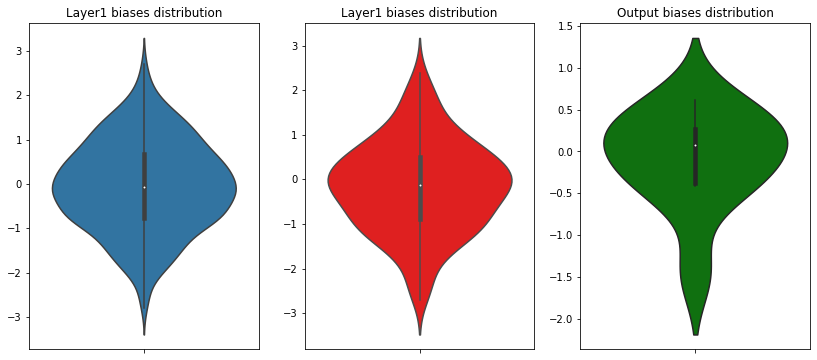

In [57]:
#Biases_final

print("The biases after running the optimization is :")
print("\n")

plt.figure(num=1, figsize=(14,6))

plt.subplot(131)
sns.violinplot(y = sess.run(biases['b1']).ravel())
plt.title("Layer1 biases distribution")

plt.subplot(132)
sns.violinplot(y = sess.run(biases['b2']).ravel(), color='red')
plt.title("Layer1 biases distribution")

plt.subplot(133)
sns.violinplot(y = sess.run(biases['out']).ravel(), color="green")
plt.title("Output biases distribution")
plt.show()

In [58]:
print('='*100)